In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [5]:
# Base directory
BASE_DIR = Path().resolve().parents[1]
INPUT_PATH = BASE_DIR / "data" / "raw" / "Global_TAVG_annual.txt"

In [8]:
# ---------- 1. LOAD & CLEAN DATA ----------

# Read data, skipping comment lines starting with '%'
data = pd.read_csv(
    INPUT_PATH,
    comment='%',
    sep='\s+',                # <- the new recommended way
    header=None,
    names=["Year", "AnnualAnomaly", "AnnualUnc", "FiveYearAnomaly", "FiveYearUnc"],
    skip_blank_lines=True
)

# Remove any non-numeric rows accidentally read
data = data[pd.to_numeric(data["Year"], errors='coerce').notnull()].copy()
data["Year"] = data["Year"].astype(int)

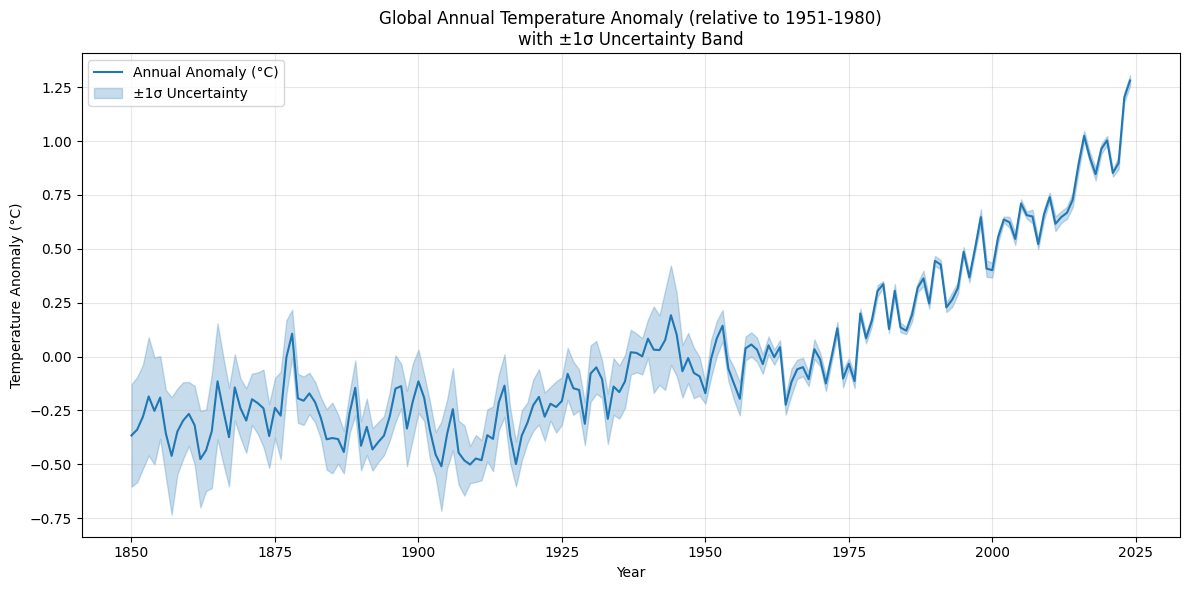

In [9]:
# ---------- 3. TIME SERIES PLOTS ----------

plt.figure(figsize=(12,6))
plt.plot(data["Year"], data["AnnualAnomaly"], label="Annual Anomaly (°C)", color='tab:blue')
# Plot ±1σ uncertainty as shaded region
plt.fill_between(
    data["Year"],
    data["AnnualAnomaly"] - data["AnnualUnc"],
    data["AnnualAnomaly"] + data["AnnualUnc"],
    color='tab:blue', alpha=0.25, label="±1σ Uncertainty"
)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Global Annual Temperature Anomaly (relative to 1951-1980)\nwith ±1σ Uncertainty Band")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

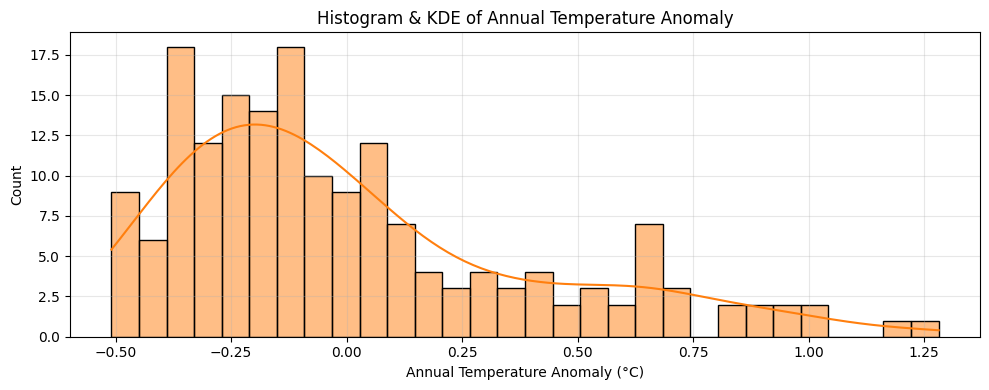

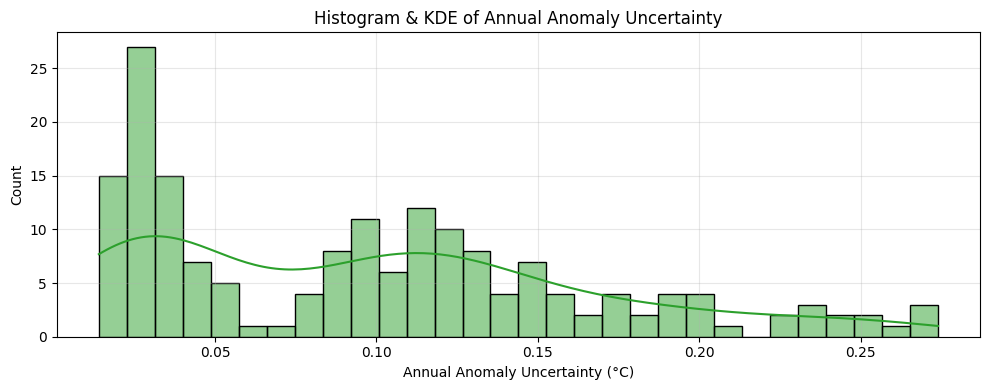

In [10]:
# ---------- 4. DISTRIBUTIONS ----------

plt.figure(figsize=(10,4))
sns.histplot(data["AnnualAnomaly"].dropna(), kde=True, bins=30, color="tab:orange")
plt.xlabel("Annual Temperature Anomaly (°C)")
plt.title("Histogram & KDE of Annual Temperature Anomaly")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(data["AnnualUnc"].dropna(), kde=True, bins=30, color="tab:green")
plt.xlabel("Annual Anomaly Uncertainty (°C)")
plt.title("Histogram & KDE of Annual Anomaly Uncertainty")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

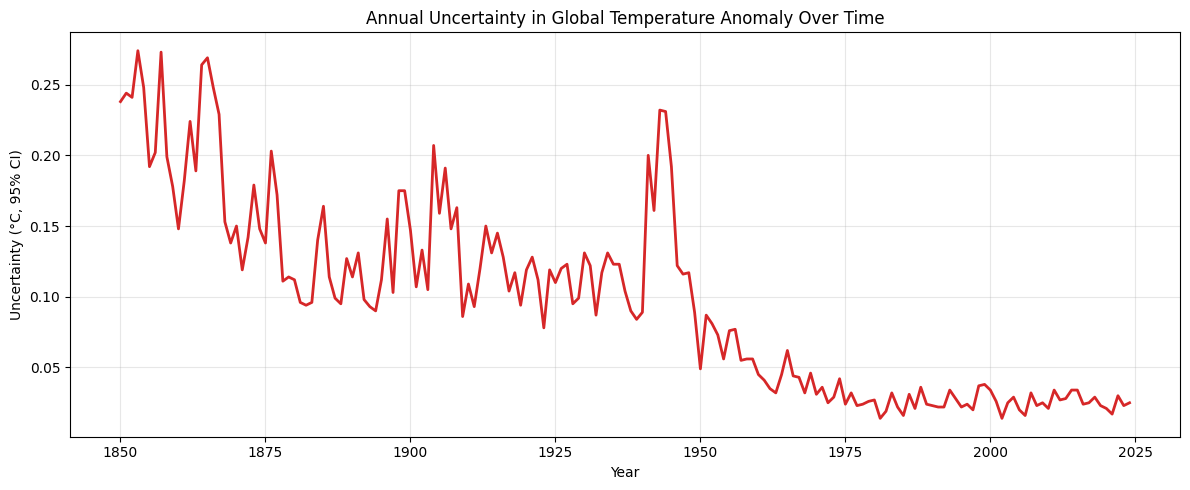

In [14]:
# ---------- 5. UNCERTAINTY OVER TIME ----------

plt.figure(figsize=(12,5))
plt.plot(data["Year"], data["AnnualUnc"], color="tab:red", lw=2)
plt.xlabel("Year")
plt.ylabel("Uncertainty (°C, 95% CI)")
plt.title("Annual Uncertainty in Global Temperature Anomaly Over Time")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Optional

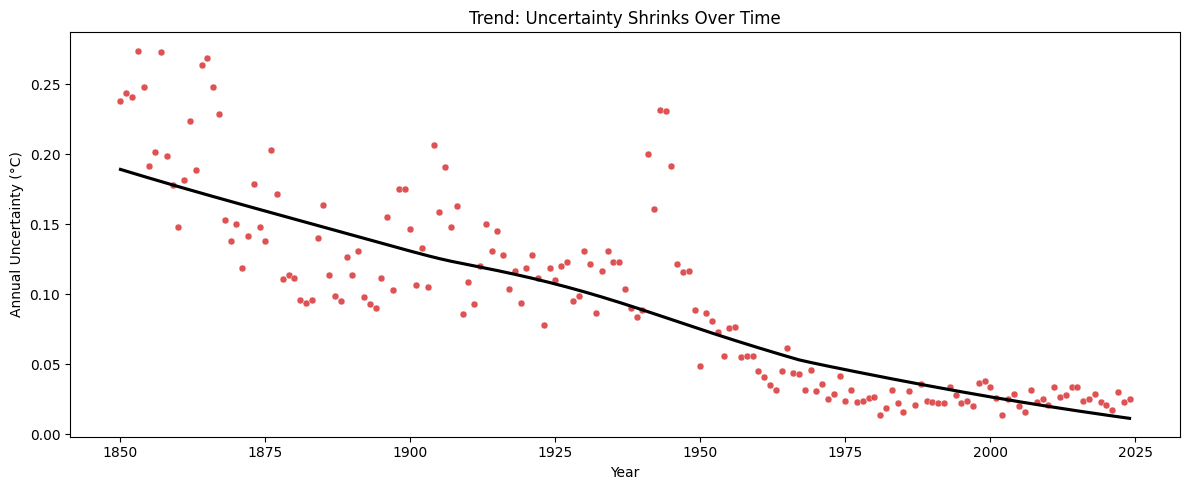

In [13]:
# Optionally, highlight how uncertainty drops with time
plt.figure(figsize=(12,5))
sns.scatterplot(x="Year", y="AnnualUnc", data=data, s=25, alpha=0.8, color="tab:red")
sns.regplot(x="Year", y="AnnualUnc", data=data, scatter=False, color="black", lowess=True)
plt.xlabel("Year")
plt.ylabel("Annual Uncertainty (°C)")
plt.title("Trend: Uncertainty Shrinks Over Time")
plt.tight_layout()
plt.show()

Optional

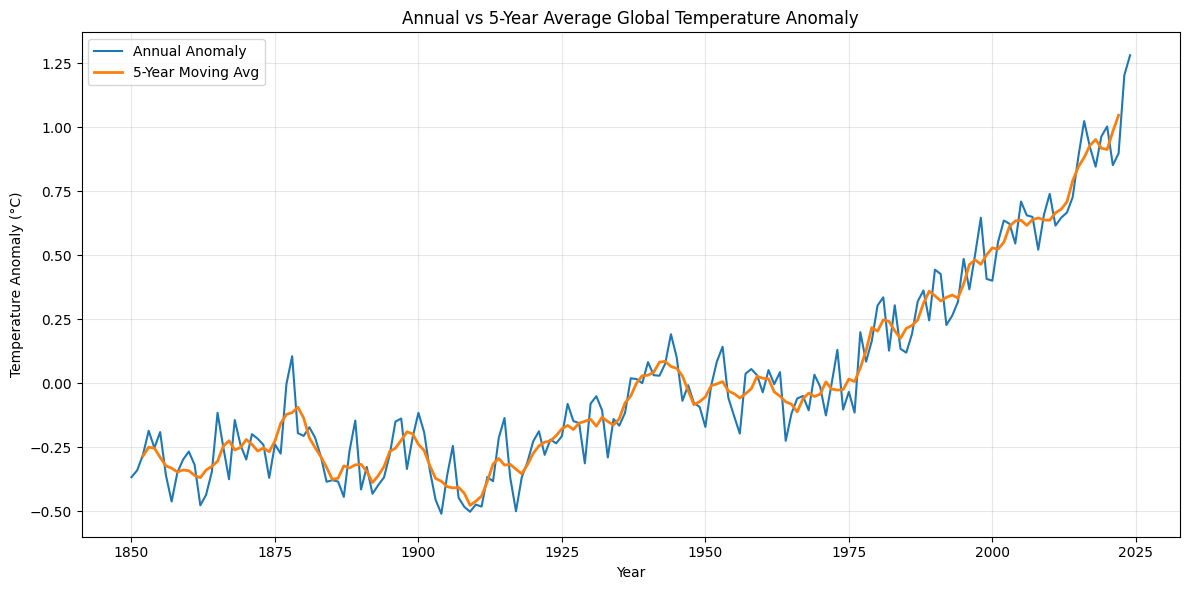

In [12]:
# ---------- 6. Additional: Five-Year Moving Average ----------

plt.figure(figsize=(12,6))
plt.plot(data["Year"], data["AnnualAnomaly"], color="tab:blue", label="Annual Anomaly")
plt.plot(data["Year"], data["FiveYearAnomaly"], color="tab:orange", label="5-Year Moving Avg", lw=2)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Annual vs 5-Year Average Global Temperature Anomaly")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()